## Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import  MaxAbsScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score



## Reading The Dataset

In [2]:
df=pd.read_csv('.\Loan_dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
df=df.drop(columns=["Loan_ID"],axis=1)

## Uni-Variate Analysis

C:\Users\jashwanthi\AppData\Local\Temp\ipykernel_4668\3594147044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.ApplicantIncome)


<AxesSubplot: xlabel='ApplicantIncome', ylabel='Density'>

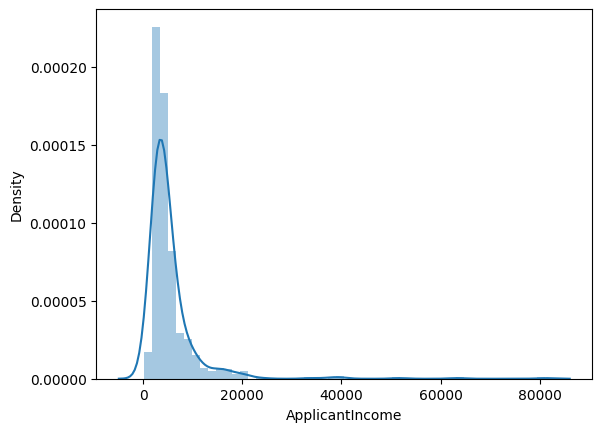

In [7]:
sns.distplot(df.ApplicantIncome)

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

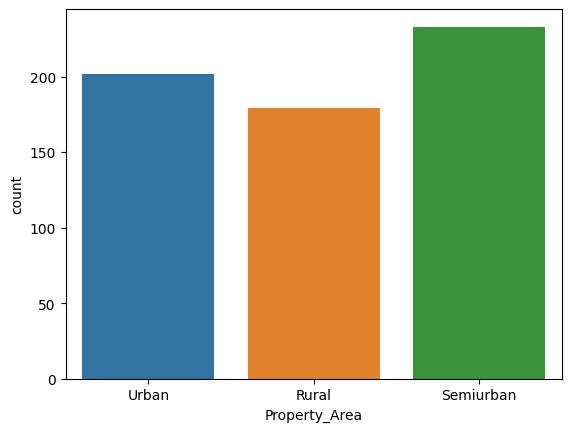

In [8]:
sns.countplot(df,x='Property_Area')

<AxesSubplot: xlabel='Gender', ylabel='count'>

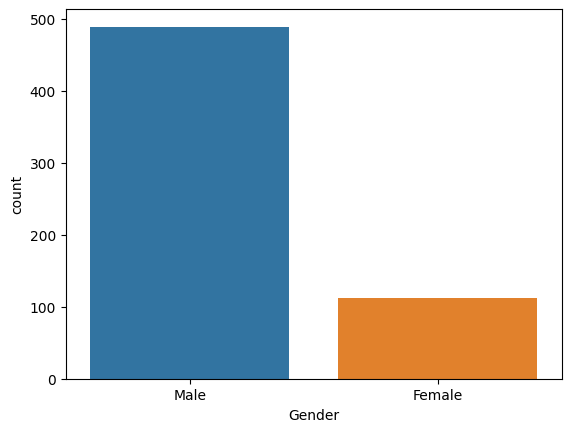

In [9]:
sns.countplot(df,x='Gender')

<AxesSubplot: xlabel='Education', ylabel='count'>

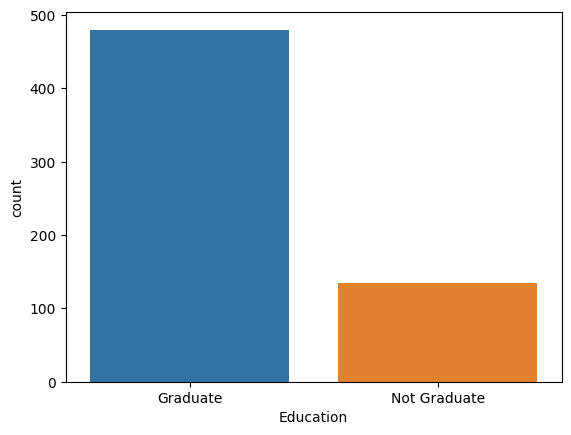

In [10]:
sns.countplot(df,x='Education')

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

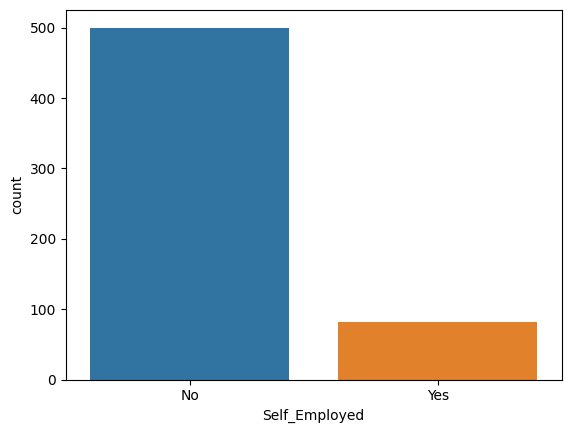

In [11]:
sns.countplot(df,x='Self_Employed')

<AxesSubplot: xlabel='Married', ylabel='count'>

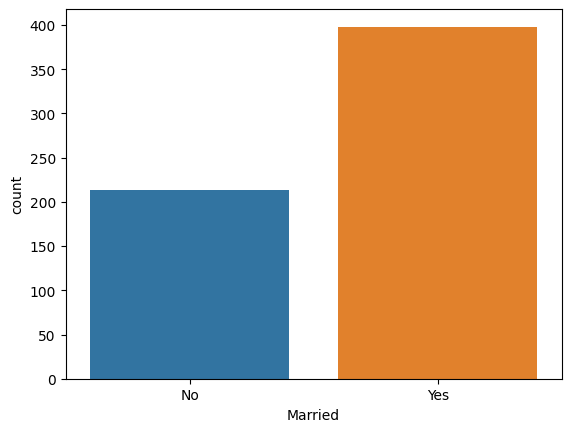

In [12]:
sns.countplot(df,x='Married')

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

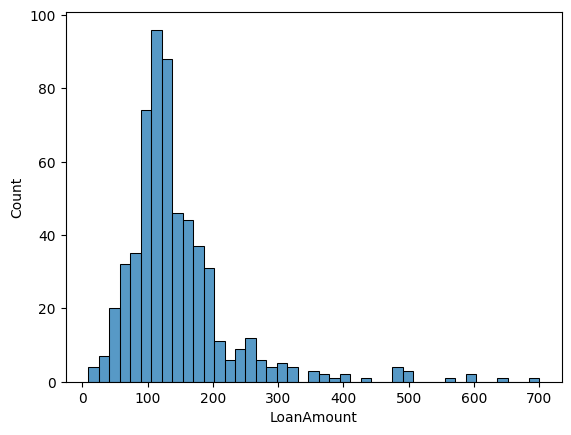

In [13]:
sns.histplot(df.LoanAmount)

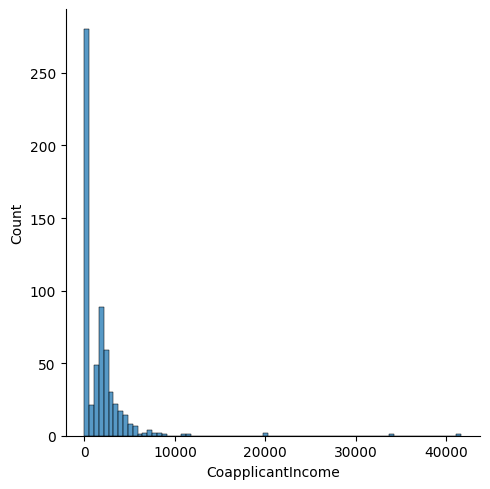

In [14]:
sns.displot(df.CoapplicantIncome)

([<matplotlib.patches.Wedge at 0x1e180679570>,
 [Text(0.40661098511372595, 1.0220897743275028, 'Semi urban'),
  Text(-1.0582795633383781, -0.3000739339235115, 'Urban'),
  Text(0.67000963198199, -0.8724030565348555, 'Rural')])

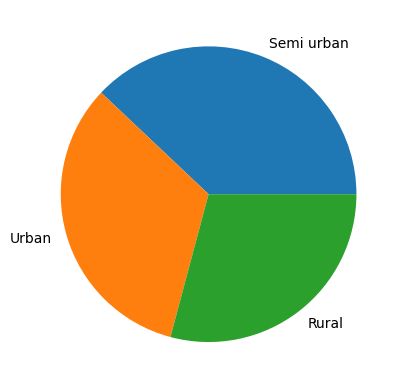

In [15]:
plt.pie(df.Property_Area.value_counts(),[0,0,0],labels=['Semi urban','Urban','Rural'])

## Bivariate Analysis

<AxesSubplot: xlabel='Married', ylabel='count'>

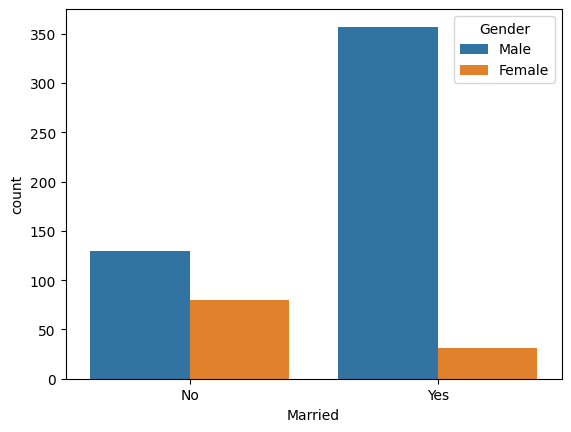

In [17]:
sns.countplot(df,x='Married',hue=df['Gender'])

In [18]:
sns.countplot(data = df,x='ApplicantIncome',hue=df['CoapplicantIncome'])

KeyboardInterrupt: 

<AxesSubplot: xlabel='LoanAmount', ylabel='count'>

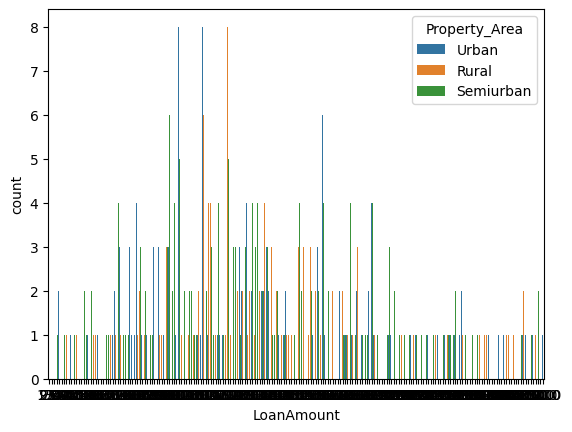

In [21]:
sns.countplot(df,x='LoanAmount',hue=df['Property_Area'])

C:\Users\LEO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

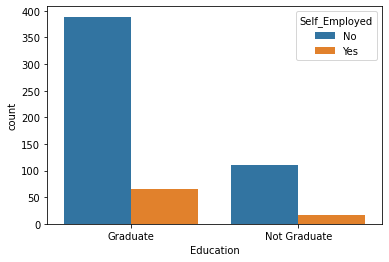

In [ ]:
sns.countplot(df['Education'],hue=df['Self_Employed'])

<AxesSubplot: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

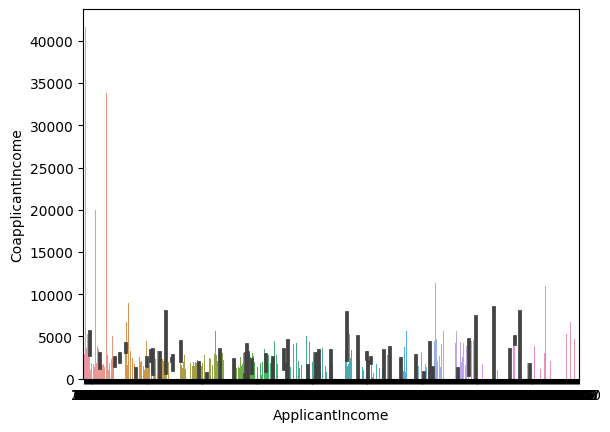

In [28]:
sns.barplot(data = df,x='ApplicantIncome',y='CoapplicantIncome')

<AxesSubplot: xlabel='LoanAmount', ylabel='count'>

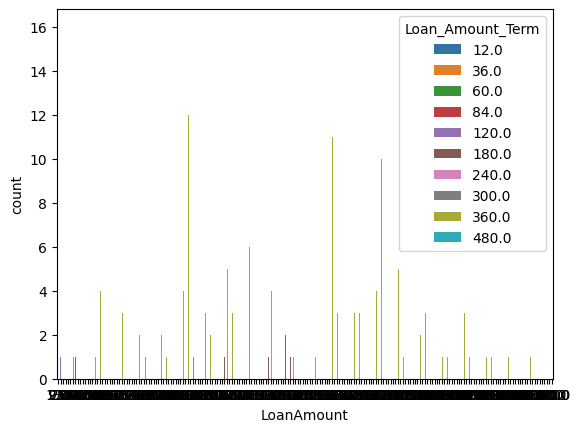

In [30]:
sns.countplot(df,x='LoanAmount',hue=df['Loan_Amount_Term'])

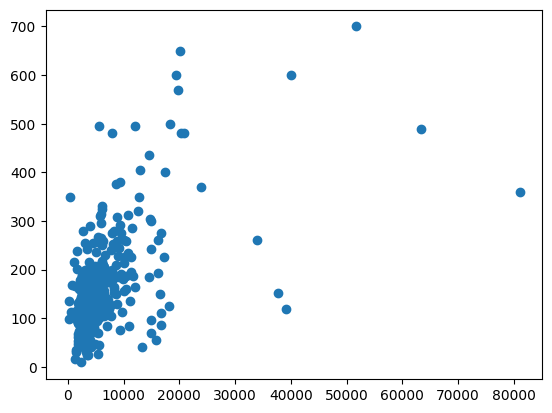

In [31]:
plt.scatter(df.ApplicantIncome,df.LoanAmount)

<AxesSubplot: xlabel='Dependents', ylabel='count'>

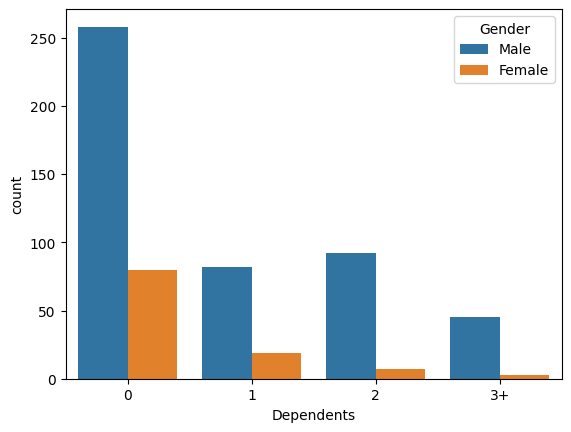

In [33]:
sns.countplot(df,x='Dependents',hue=df['Gender'])

## Multi variate Analysis

C:\Users\jashwanthi\AppData\Local\Temp\ipykernel_4668\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

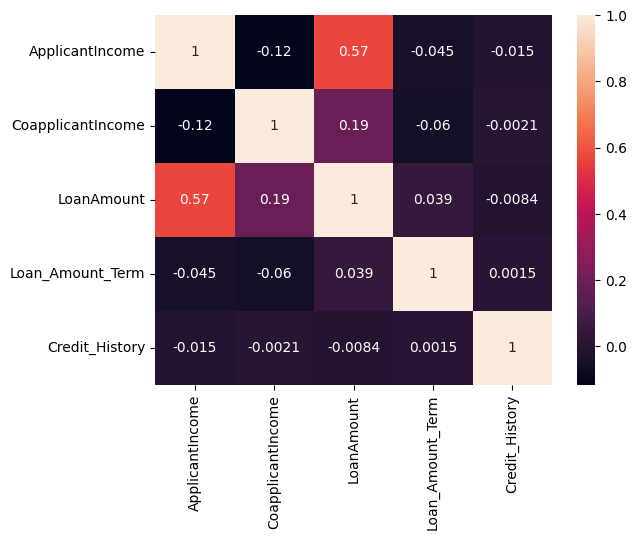

In [34]:
sns.heatmap(df.corr(),annot=True)

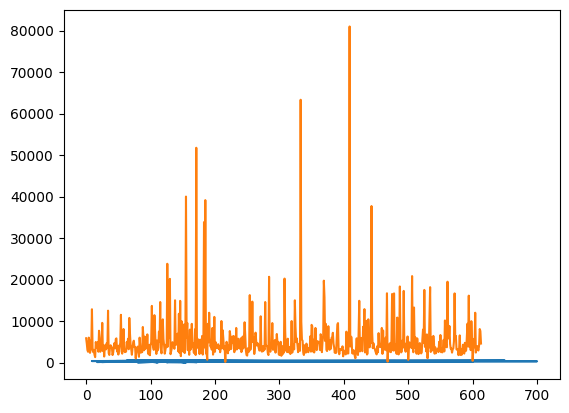

In [35]:
plt.plot(df.LoanAmount,df.Loan_Amount_Term,df.ApplicantIncome)

<AxesSubplot: >

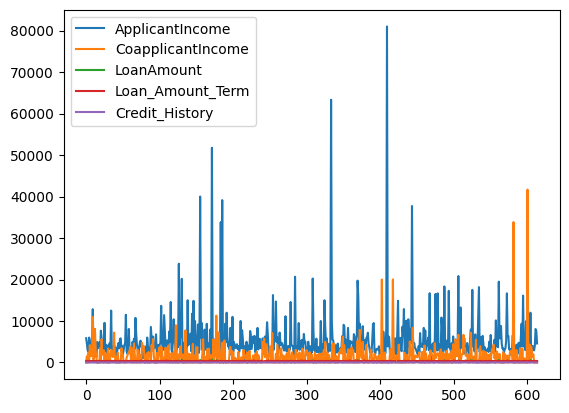

In [36]:
df.plot.line()

array([[<AxesSubplot: title={'center': 'ApplicantIncome'}>,
        <AxesSubplot: title={'center': 'CoapplicantIncome'}>],
       [<AxesSubplot: title={'center': 'LoanAmount'}>,
        <AxesSubplot: title={'center': 'Loan_Amount_Term'}>],
       [<AxesSubplot: title={'center': 'Credit_History'}>,
        <AxesSubplot: >]], dtype=object)

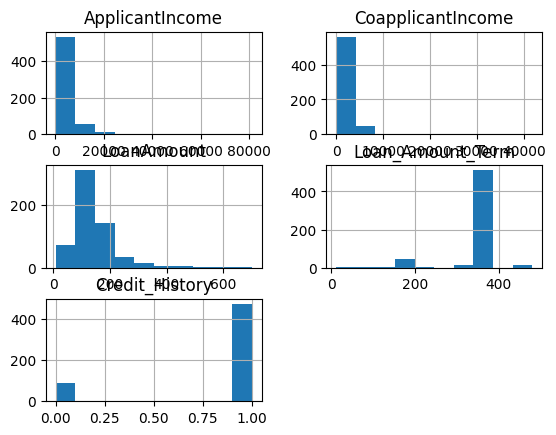

In [37]:
df.hist()

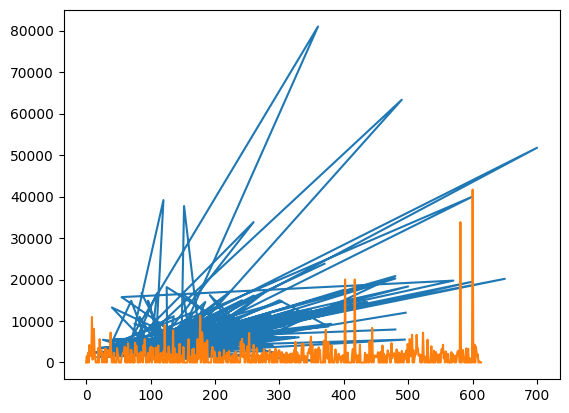

In [38]:
plt.plot(df.LoanAmount,df.ApplicantIncome,df.CoapplicantIncome)

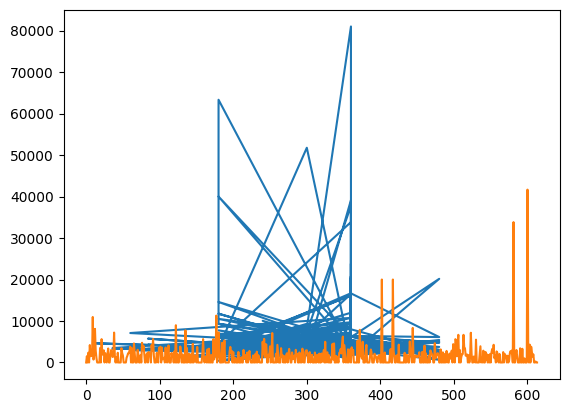

In [39]:
plt.plot(df.Loan_Amount_Term,df.ApplicantIncome,df.CoapplicantIncome)

## Descriptive Analysis

In [40]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [41]:
df.std()

C:\Users\jashwanthi\AppData\Local\Temp\ipykernel_4668\3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             85.587325
Loan_Amount_Term       65.120410
Credit_History          0.364878
dtype: float64

In [42]:
df.mean()

C:\Users\jashwanthi\AppData\Local\Temp\ipykernel_4668\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [43]:
df.mode()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,2500,0.0,120.0,360.0,1.0,Semiurban,Y


## Data Pre-Processing

## Check for Null Values

In [44]:
df.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [45]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [47]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [48]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [49]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling Categorical Values

In [50]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [51]:
le=LabelEncoder()

In [52]:
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)
df.Loan_Status=le.fit_transform(df.Loan_Status)
df.Dependents=le.fit_transform(df.Dependents)

In [53]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## Spliting data as dependent and independent data


In [54]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [55]:
x=df.iloc[:,:-1]
y=df.Loan_Status

In [56]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [57]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

## Scaling The Data

In [58]:
scaler = MaxAbsScaler()
x_sc=scaler.fit_transform(x)
x_sc

array([[1.        , 0.        , 0.        , ..., 0.75      , 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.75      , 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.75      , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.75      , 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.75      , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.75      , 0.        ,
        0.5       ]])

## Balancing The Dataset

<AxesSubplot: ylabel='count'>

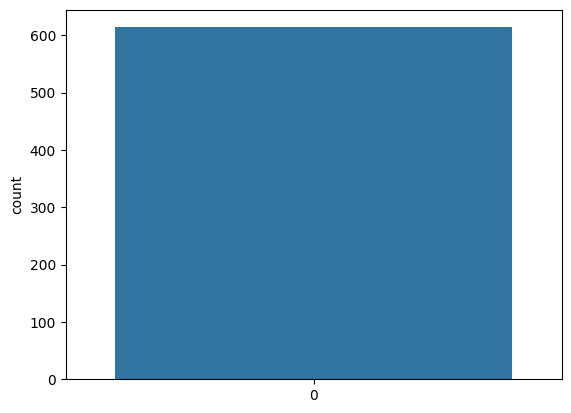

In [59]:
sns.countplot(df.Loan_Status)

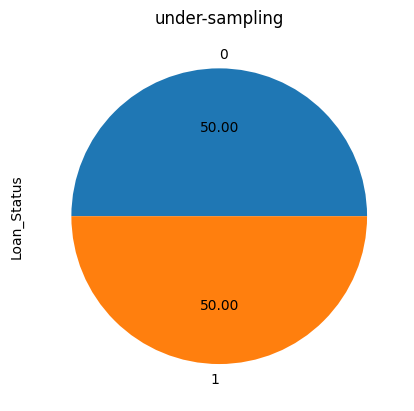

In [60]:
rus=RandomUnderSampler(sampling_strategy=1)
x_res,y_res=rus.fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("under-sampling")

## Splitting Data Into Train and Test

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [62]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
245,1,0,0,0,1,6050,4333.0,120.0,180.0,1.0,2
413,1,1,0,1,0,2253,2033.0,110.0,360.0,1.0,0
126,1,1,3,0,0,23803,0.0,370.0,360.0,1.0,0
531,1,1,3,0,0,4281,0.0,100.0,360.0,1.0,2
188,1,1,0,0,1,674,5296.0,168.0,360.0,1.0,0


In [63]:
xtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
285,1,0,0,0,0,3158,3053.0,89.0,360.0,1.000000,0
323,0,0,0,0,0,3166,2985.0,132.0,360.0,0.842199,0
482,1,1,0,0,0,2083,3150.0,128.0,360.0,1.000000,1
173,1,1,0,0,0,5708,5625.0,187.0,360.0,1.000000,1
518,1,0,0,0,0,4683,1915.0,185.0,360.0,1.000000,1


In [64]:
ytrain.head()

245    0
413    1
126    1
531    1
188    1
Name: Loan_Status, dtype: int32

In [65]:
ytest.head()

285    1
323    1
482    1
173    1
518    0
Name: Loan_Status, dtype: int32

In [66]:
xtrain.shape

(429, 11)

In [67]:
xtest.shape

(185, 11)

In [68]:
ytrain.shape

(429,)

In [69]:
ytest.shape

(185,)

## Model Building

## Decision Tree Model

In [70]:
dmodel=DecisionTreeClassifier(random_state=100)

In [71]:
dmodel.fit(x_res,y_res)

DecisionTreeClassifier(random_state=100)

In [72]:
ypredd=dmodel.predict(xtest)

In [73]:
ypred2d=dmodel.predict(xtrain)

## Random Forest Model

In [74]:
Rmodel=RandomForestClassifier(n_estimators=100,max_depth=12,max_features=3)

In [75]:
Rmodel.fit(x_res,y_res)

RandomForestClassifier(max_depth=12, max_features=3)

In [76]:
ypredR=Rmodel.predict(xtest)

In [77]:
ypred2R=Rmodel.predict(xtrain)

## KNN Model

In [78]:
kmodel=KNeighborsClassifier()

In [79]:
kmodel.fit(x_res,y_res)

KNeighborsClassifier()

In [80]:
ypredk=kmodel.predict(xtest)

In [81]:
ypred2k=kmodel.predict(xtrain)

## Xgboost Model

In [82]:
xmodel=XGBClassifier(eval_metric='mlogloss',n_estimators=100,random_state=100)

In [83]:
xmodel.fit(x_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=100, ...)

In [84]:
ypredx=xmodel.predict(xtest)

In [85]:
ypred2x=xmodel.predict(xtrain)

## Compare The Model

In [86]:
print("Decision Tree Model Testing Accuracy")
print(accuracy_score(ytest,ypredd))
print("Decision Tree Model Training Accuracy")
print(accuracy_score(ytrain,ypred2d))

Decision Tree Model Testing Accuracy
0.8864864864864865
Decision Tree Model Training Accuracy
0.8717948717948718


In [87]:
print("Random Forest Model Testing Accuracy")
print(accuracy_score(ytest,ypredR))
print("Random Forest Model Training Accuracy")
print(accuracy_score(ytrain,ypred2R))

Random Forest Model Testing Accuracy
0.8972972972972973
Random Forest Model Training Accuracy
0.9370629370629371


In [88]:
print("KNN Model Testing Accuracy")
print(accuracy_score(ytest,ypredk))
print("KNN Model Training Accuracy")
print(accuracy_score(ytrain,ypred2k))

KNN Model Testing Accuracy
0.5837837837837838
KNN Model Training Accuracy
0.6083916083916084


In [89]:
print("Xgboost Model Testing Accuracy")
print(accuracy_score(ytest,ypredx))
print("Xgboost Model Training Accuracy")
print(accuracy_score(ytrain,ypred2x))

Xgboost Model Testing Accuracy
0.8864864864864865
Xgboost Model Training Accuracy
0.8927738927738927


## Evaluating Performance Of The Model And Saving The Model

In [90]:
## Random Forest Model is Selected

In [91]:
print("Random Forest Model Testing Accuracy")
print(accuracy_score(ytest,ypredR))
print("Random Forest Model Training Accuracy")
print(accuracy_score(ytrain,ypred2R))

Random Forest Model Testing Accuracy
0.8972972972972973
Random Forest Model Training Accuracy
0.9370629370629371


In [92]:
y=Rmodel.predict([[1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0]])
print(y)
y1=Rmodel.predict([[1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2]])
print(y1)
y2=Rmodel.predict([[1,0,0,1,0,678,987,90,24,1.0,2]])
print(y2)

[0]
[1]
[0]


c:\Users\jashwanthi\.conda\envs\deployment\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\jashwanthi\.conda\envs\deployment\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\jashwanthi\.conda\envs\deployment\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [93]:
f1_score(ypredR,ytest,average='weighted')

0.893893243740912

In [94]:
pd.crosstab(ytest,ypredR)

col_0,0,1
Loan_Status,,
0,50,2
1,17,116


In [95]:
print(classification_report(ypredR,ytest))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84        67
           1       0.87      0.98      0.92       118

    accuracy                           0.90       185
   macro avg       0.92      0.86      0.88       185
weighted avg       0.90      0.90      0.89       185



In [96]:
##Saving the model by using pickle function
pickle.dump(Rmodel,open('Rfmodel.pkl','wb'))
pickle.dump(scaler,open('rfscale.pkl','wb'))